In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
from scipy import signal
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from utils import *

path=["/Users/RobertYangSun/Desktop/Dr. Mani Research/ExportData/","/Users/RobertYangSun/Desktop/Dr. Mani Research/Data/"]

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
training_set, dev_set, test_set = preprocessing(path)

x_train, x_train_original, y_train = training_set['fiber_data_processed'], training_set['fiber_data_unprocessed'], training_set['ecg_data']
x_dev, x_dev_original, y_dev = dev_set['fiber_data_processed'], dev_set['fiber_data_unprocessed'], dev_set['ecg_data']
x_test, x_test_original, y_test = test_set['fiber_data_processed'], test_set['fiber_data_unprocessed'], test_set['ecg_data']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

print("Shape of training data: "+str(x_train.shape))
print("Shape of dev data: "+str(x_dev.shape))
print("Shape of test data: "+str(x_dev.shape))

print("Shape of training labels: "+str(y_train.shape))
print("Shape of dev labels: "+str(y_dev.shape))
print("Shape of test labels: "+str(y_test.shape))

Num GPUs Available:  1
Num CPUs Available:  1
Shape of training data: (88, 3001)
Shape of dev data: (11, 3001)
Shape of test data: (11, 3001)
Shape of training labels: (88, 2)
Shape of dev labels: (11, 2)
Shape of test labels: (11, 2)


In [4]:
def DNN(input_shape,layers):
    fiber_data = Input(shape=input_shape,dtype="double")
    units = [[4],[8,4],[16,8,4],[32,16,8,4],[64,32,16,8,4],[128,64,32,16,8,4],[256,128,64,32,16,8,4],[512,256,128,64,32,16,8,4],[1024,512,256,128,64,32,16,8,4],[2048,1024,512,256,128,64,32,16,8,4]]
    X = fiber_data
    for layer in range(layers):
        X = Dense(units=units[layers-1][layer],activation="relu",use_bias=True,kernel_regularizer=tf.keras.regularizers.L2(0.001),bias_regularizer=tf.keras.regularizers.L2(0.001))(X)
        X = Dropout(0.5)(X)
        X = BatchNormalization()(X)
#     X = Dense(units=1,activation="linear",use_bias=True,kernel_regularizer=tf.keras.regularizers.L2(0.01),bias_regularizer=tf.keras.regularizers.L2(0.01))(X)
    X = Dense(units=2,activation="linear",use_bias=True,kernel_regularizer=tf.keras.regularizers.L2(0.01),bias_regularizer=tf.keras.regularizers.L2(0.01))(X)
    model = Model(inputs=fiber_data,outputs=X)
    return model

In [5]:
input_shape = (x_train[0].shape[0],)
layer=5
model = DNN(input_shape,layers=layer)
model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3001)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                192128    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (N

2021-09-20 15:51:57.005906: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-20 15:51:57.006180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.save_weights('model.h5')

Epoch 1/500


2021-09-20 15:56:26.485483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 36ms/step - loss: 20.9121
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 20.9815
Epoch 3/500
3/3 [==============================] - 0s 30ms/step - loss: 20.8563
Epoch 4/500
3/3 [==============================] - 0s 29ms/step - loss: 20.7784
Epoch 5/500
3/3 [==============================] - 0s 29ms/step - loss: 20.8656
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 20.7833
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 20.7947
Epoch 8/500
3/3 [==============================] - 0s 27ms/step - loss: 20.7327
Epoch 9/500
3/3 [==============================] - 0s 27ms/step - loss: 20.6626
Epoch 10/500
3/3 [==============================] - 0s 30ms/step - loss: 20.6851
Epoch 11/500
3/3 [==============================] - 0s 29ms/step - loss: 20.6822
Epoch 12/500
3/3 [==============================] - 0s 28ms/step - loss: 20.6681
Epoch 13/500
3/3 [==============================]

3/3 [==============================] - 0s 27ms/step - loss: 18.1538
Epoch 103/500
3/3 [==============================] - 0s 26ms/step - loss: 18.1263
Epoch 104/500
3/3 [==============================] - 0s 25ms/step - loss: 18.1085
Epoch 105/500
3/3 [==============================] - 0s 26ms/step - loss: 18.0495
Epoch 106/500
3/3 [==============================] - 0s 25ms/step - loss: 17.9902
Epoch 107/500
3/3 [==============================] - 0s 27ms/step - loss: 17.9976
Epoch 108/500
3/3 [==============================] - 0s 26ms/step - loss: 17.9581
Epoch 109/500
3/3 [==============================] - 0s 27ms/step - loss: 17.8866
Epoch 110/500
3/3 [==============================] - 0s 26ms/step - loss: 17.9023
Epoch 111/500
3/3 [==============================] - 0s 26ms/step - loss: 17.9107
Epoch 112/500
3/3 [==============================] - 0s 26ms/step - loss: 17.8584
Epoch 113/500
3/3 [==============================] - 0s 27ms/step - loss: 17.8221
Epoch 114/500
3/3 [===========

3/3 [==============================] - 0s 27ms/step - loss: 14.8317
Epoch 203/500
3/3 [==============================] - 0s 26ms/step - loss: 14.7689
Epoch 204/500
3/3 [==============================] - 0s 26ms/step - loss: 14.7707
Epoch 205/500
3/3 [==============================] - 0s 26ms/step - loss: 14.7194
Epoch 206/500
3/3 [==============================] - 0s 26ms/step - loss: 14.6924
Epoch 207/500
3/3 [==============================] - 0s 26ms/step - loss: 14.6163
Epoch 208/500
3/3 [==============================] - 0s 27ms/step - loss: 14.5861
Epoch 209/500
3/3 [==============================] - 0s 27ms/step - loss: 14.6056
Epoch 210/500
3/3 [==============================] - 0s 26ms/step - loss: 14.5507
Epoch 211/500
3/3 [==============================] - 0s 27ms/step - loss: 14.5274
Epoch 212/500
3/3 [==============================] - 0s 27ms/step - loss: 14.4818
Epoch 213/500
3/3 [==============================] - 0s 26ms/step - loss: 14.4371
Epoch 214/500
3/3 [===========

3/3 [==============================] - 0s 26ms/step - loss: 10.9155
Epoch 303/500
3/3 [==============================] - 0s 27ms/step - loss: 10.8779
Epoch 304/500
3/3 [==============================] - 0s 26ms/step - loss: 10.8292
Epoch 305/500
3/3 [==============================] - 0s 26ms/step - loss: 10.7953
Epoch 306/500
3/3 [==============================] - 0s 27ms/step - loss: 10.7601
Epoch 307/500
3/3 [==============================] - 0s 26ms/step - loss: 10.7159
Epoch 308/500
3/3 [==============================] - 0s 26ms/step - loss: 10.6394
Epoch 309/500
3/3 [==============================] - 0s 27ms/step - loss: 10.5976
Epoch 310/500
3/3 [==============================] - 0s 27ms/step - loss: 10.5961
Epoch 311/500
3/3 [==============================] - 0s 27ms/step - loss: 10.5474
Epoch 312/500
3/3 [==============================] - 0s 27ms/step - loss: 10.4868
Epoch 313/500
3/3 [==============================] - 0s 27ms/step - loss: 10.4722
Epoch 314/500
3/3 [===========

3/3 [==============================] - 0s 27ms/step - loss: 6.6074
Epoch 404/500
3/3 [==============================] - 0s 28ms/step - loss: 6.5892
Epoch 405/500
3/3 [==============================] - 0s 27ms/step - loss: 6.5461
Epoch 406/500
3/3 [==============================] - 0s 27ms/step - loss: 6.5267
Epoch 407/500
3/3 [==============================] - 0s 27ms/step - loss: 6.5341
Epoch 408/500
3/3 [==============================] - 0s 26ms/step - loss: 6.4530
Epoch 409/500
3/3 [==============================] - 0s 27ms/step - loss: 6.4348
Epoch 410/500
3/3 [==============================] - 0s 26ms/step - loss: 6.3935
Epoch 411/500
3/3 [==============================] - 0s 27ms/step - loss: 6.3081
Epoch 412/500
3/3 [==============================] - 0s 26ms/step - loss: 6.3093
Epoch 413/500
3/3 [==============================] - 0s 27ms/step - loss: 6.2565
Epoch 414/500
3/3 [==============================] - 0s 27ms/step - loss: 6.2510
Epoch 415/500
3/3 [=======================

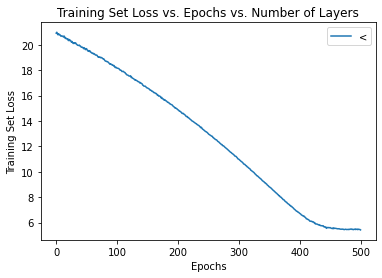

In [27]:
model.compile(loss='mae', optimizer='adam')
history = model.fit(x_train, y_train, epochs = 500, batch_size = 30, shuffle=True)
plt.figure(1)
plt.title('Training Set Loss vs. Epochs vs. Number of Layers')
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Set Loss')
plt.legend(str(layer)+' Layer(s)')

In [8]:
# model.load_weights('model.h5')

In [28]:
loss = model.evaluate(x_dev, y_dev)

1/1 [==============================] - 0s 106ms/step - loss: 6.4693


2021-09-20 15:57:40.064233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


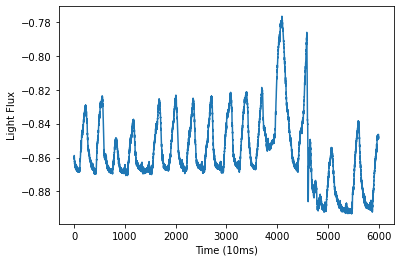

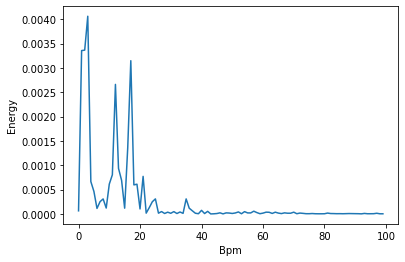

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 96, Truth RR: 15



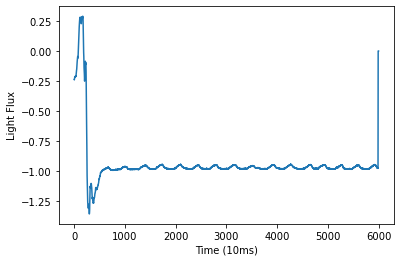

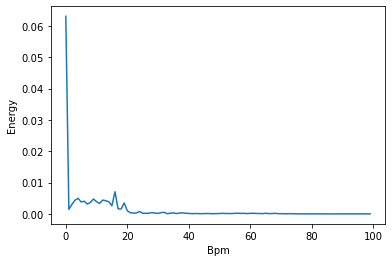

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 63, Truth RR: 20



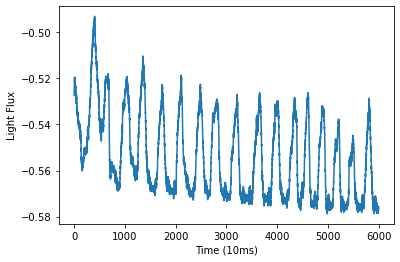

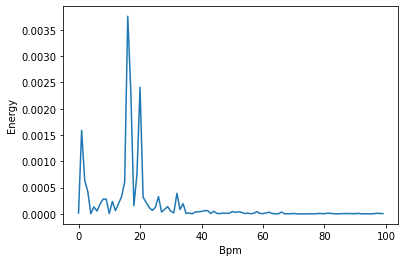

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 62, Truth RR: 13



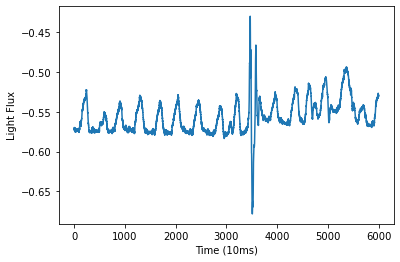

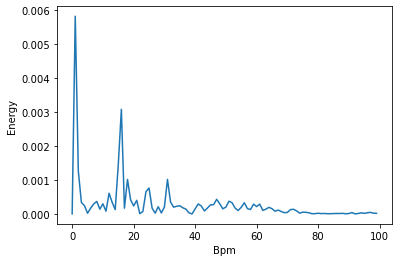

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 48, Truth RR: 15



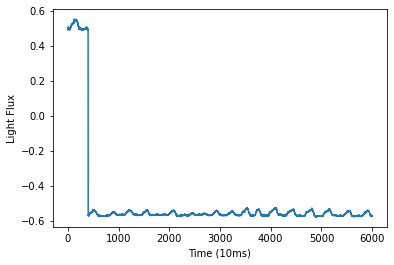

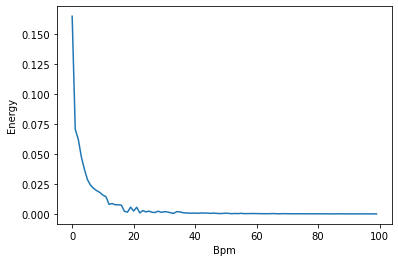

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 51, Truth RR: 14



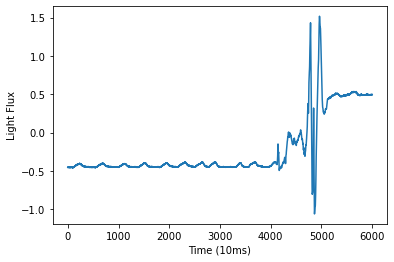

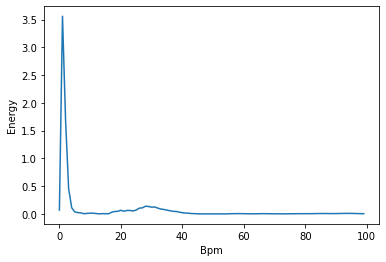

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 43, Truth RR: 13



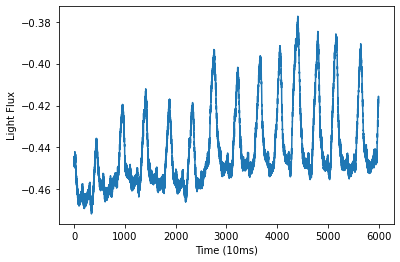

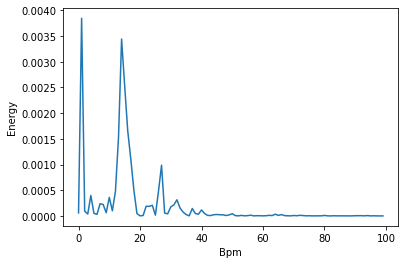

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 42, Truth RR: 14



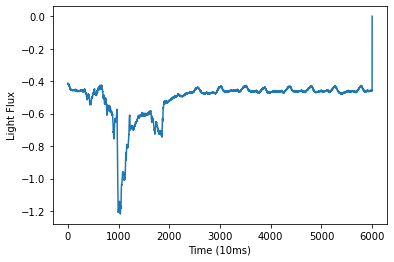

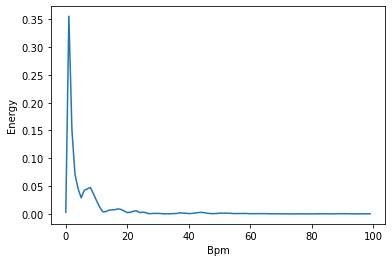

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 52, Truth RR: 9



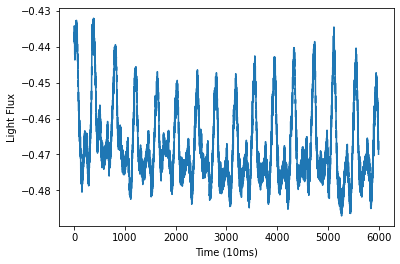

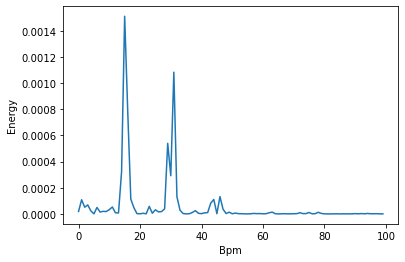

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 59, Truth RR: 11



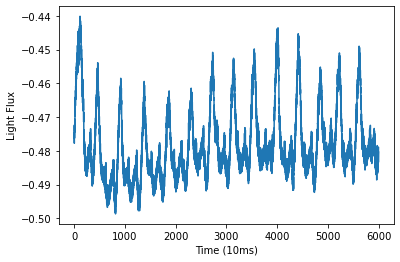

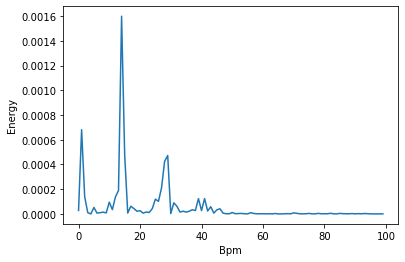

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 51, Truth RR: 13



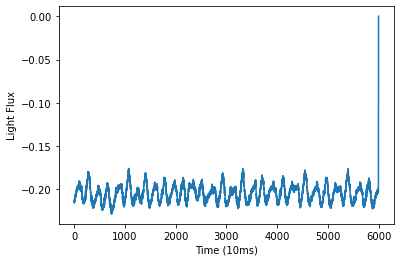

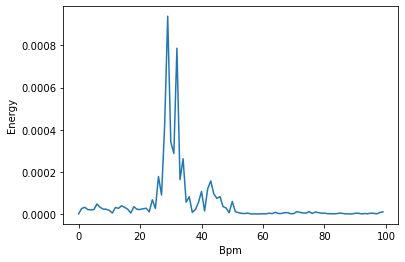

Predicted HR: 50.33252, Predicted RR: 13.9894285
Truth HR: 49, Truth RR: 7



In [29]:
nperseg=6000
fs=100
for index, example in enumerate(x_dev):
    truth = y_dev[index]
    prediction = model(example.reshape(1,-1)).numpy().flatten()
    plt.figure(index)
    plt.plot(x_dev_original[index])
    plt.xlabel("Time (10ms)")
    plt.ylabel("Light Flux")
    plt.figure(index+len(x_dev))
    freqs, times, spec = signal.spectrogram(x_dev_original[index], nperseg=nperseg, fs=fs)
    plt.plot(freqs[0:100]*60, spec[0:100])
    plt.xlabel("Bpm")
    plt.ylabel("Energy")
    plt.pause(0.01)
    print("Predicted HR: "+str(prediction[0])+", "+"Predicted RR: "+str(prediction[1]))
    print("Truth HR: "+str(truth[0])+", "+"Truth RR: "+str(truth[1]))
    print()

In [11]:
# input_shape = (training_set["fiber_data"][0].shape[0],training_set["fiber_data"][0].shape[1],)
# losses = []
# dnn_models = []
# layers = 10
# for layer in range(1,layers+1):
#     dnn_model = DNN(input_shape,layers=layer)
#     dnn_model.summary()
#     dnn_model.compile(loss='mean_absolute_error', optimizer='adam')
#     history = dnn_model.fit(x_train, y_train, epochs = 200, batch_size = 30, shuffle=True)
#     dnn_models.append(dnn_model)
    
#     loss = dnn_model.evaluate(x_dev, y_dev)
#     losses.append(loss)
    
#     plt.figure(1)
#     plt.title('Training Set Loss vs. Epochs vs. Number of Layers')
#     plt.plot(history.history['loss'])
#     plt.xlabel('Epochs')
#     plt.ylabel('Training Set Loss')
#     plt.legend([str(i)+' Layer(s)' for i in range(1,layers+1)])
    
# plt.figure(-1)
# plt.title('Dev Set Loss vs. Number of Layers')
# plt.plot(losses)
# plt.xlabel('Number of Layers')
# plt.ylabel('Dev Set Loss')
# plt.xticks(np.arange(1,layers+1,step=1))

In [12]:
# for index, example in enumerate(training_set["fiber_data"][:100]):
#     plt.figure(index)
#     plt.plot(example)
#     print("Truth heart rate: "+str(training_set["heart_rate_data"][index])+", "+"Truth respiration rate: "+str(training_set["respiration_rate_data"][index]))
#     print()

In [13]:
# n_a = 256
# n_values = 1000
# reshaper = Reshape((1,n_values))
# LSTM_cell = LSTM(n_a, return_state = True, kernel_regularizer='l2', bias_regularizer='l2')
# densor = Dense(2)

In [14]:
# def LSTM_model(Tx, reshaper, LSTM_cell, densor):
#     n_values = 1000
#     n_a = LSTM_cell.units
#     X = Input(shape=(Tx, n_values)) 
    
#     a0 = Input(shape=(n_a,), name='a0')
#     c0 = Input(shape=(n_a,), name='c0')
#     a = a0
#     c = c0

#     for t in range(Tx):
#         x = X[:,t,:]
#         x = reshaper(x)
#         a, _, c = LSTM_cell(x, initial_state=[a, c])
#     out = densor(a)

#     model = Model(inputs=[X, a0, c0], outputs=out)
#     return model

In [15]:
# m = x_train.shape[0]
# a0 = np.zeros((m, n_a))
# c0 = np.zeros((m, n_a))
# Tx=6
# model = LSTM_model(Tx,reshaper,LSTM_cell,densor)
# model.summary()

In [16]:
# model.save_weights('model.h5')

In [17]:
# opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
# model.compile(optimizer=opt, loss='mean_absolute_error')
# history = model.fit([x_train, a0, c0], y_train, epochs=1000, verbose = 1)
# plt.plot(history.history['loss'])

In [18]:
print(model.layers)
for layer in model.layers:
    print(layer.weights)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x17a99bdc0>, <tensorflow.python.keras.layers.core.Dense object at 0x17a974130>, <tensorflow.python.keras.layers.core.Dropout object at 0x17a974520>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x17a974ac0>, <tensorflow.python.keras.layers.core.Dense object at 0x17a937f10>, <tensorflow.python.keras.layers.core.Dropout object at 0x17a9377c0>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x17a926130>, <tensorflow.python.keras.layers.core.Dense object at 0x17a9223d0>, <tensorflow.python.keras.layers.core.Dropout object at 0x17a922c40>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x294c637f0>, <tensorflow.python.keras.layers.core.Dense object at 0x294c6a880>, <tensorflow.python.keras.layers.core.Dropout object at 0x294c6af10>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x294c70c70>, <tensorf

In [19]:
# m = x_dev.shape[0]
# a0 = np.zeros((m, n_a))
# c0 = np.zeros((m, n_a))
# loss = model.evaluate([x_dev, a0, c0], y_dev)

In [20]:
# m = x_dev.shape[0]
# a_initializer = np.zeros((m, n_a))
# c_initializer = np.zeros((m, n_a))
# predictions = model.predict([x_dev,a_initializer,c_initializer])
# for index, pred in enumerate(predictions):
#     plt.figure(index)
#     plt.plot(x_dev[index].flatten())
#     print(f"Prediction: {pred}")
#     print(f"Truth: {y_dev[index]}")

In [21]:
# nperseg = 2048
# fs = 100
# for index, example in enumerate(x_train[0:100]):
#     plt.figure(index)
#     freqs, times, spec = signal.spectrogram(example, nperseg=nperseg, fs=fs)
#     print(freqs.shape)
#     plt.figure(index+100)
#     print(y_train[index])
#     plt.plot(example)
#     plt.figure(index+200)
#     plt.plot(freqs[0:50],spec[0:50])

In [22]:
# model.load_weights('model.h5')